In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import logistic_regression_util

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Grab Iris Dataset
from pydataset import data
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# columns name change
df.columns = [col.lower().replace('.','_') for col in df]
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
# we will have 2 different target variables 
dummies = pd.get_dummies(df['species'], drop_first=True)
dummies.head()

,versicolor,virginica
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0


In [5]:
# concat dummies and original df. Drop 'species column'
df = pd.concat([df, dummies], axis=1).drop(columns = ['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
1,5.1,3.5,1.4,0.2,0,0
2,4.9,3.0,1.4,0.2,0,0
3,4.7,3.2,1.3,0.2,0,0
4,4.6,3.1,1.5,0.2,0,0
5,5.0,3.6,1.4,0.2,0,0


## Predict if species is versicolor or not

In [6]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [7]:
train, validate, test = train_validate_test_split(df,
                                                  target = 'versicolor',
                                                  seed=123)

In [8]:
train.shape, validate.shape, test.shape

((84, 6), (36, 6), (30, 6))

In [9]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
97,5.7,2.9,4.2,1.3,1,0
125,6.7,3.3,5.7,2.1,0,1
87,6.7,3.1,4.7,1.5,1,0
13,4.8,3.0,1.4,0.1,0,0
122,5.6,2.8,4.9,2.0,0,1


In [12]:
# Make new dataframes
X_train = train.drop(columns=['versicolor', 'virginica'])
y_train = train.versicolor

X_validate = validate.drop(columns=['versicolor', 'virginica'])
y_validate = validate.versicolor

X_test = test.drop(columns=['versicolor', 'virginica'])
y_test = test.versicolor

In [13]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
97,5.7,2.9,4.2,1.3
125,6.7,3.3,5.7,2.1
87,6.7,3.1,4.7,1.5
13,4.8,3.0,1.4,0.1
122,5.6,2.8,4.9,2.0


In [14]:
X_train.shape, y_train.shape

((84, 4), (84,))

### Hyperparameters
#### Regularization:
- Keep model simple
- Constraints the coefficients
- Discourages learning more complex model
- Minimizes overfitting
- avoid overfitting
- L1 - Lasso
- L2 - Ridge

#### C = Inverse of regularization strength:

- Lower C - higher regularization
- As C decreases, more coefficients become 0.
- Lower C discourages learning more complex model
- minimizes overfitting

# Model 1

In [15]:
# Define the logistic regression model
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123)

In [16]:
#  fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)

In [17]:
# now use the model to make predictions
y_pred = logit.predict(X_train)

In [18]:
#take a look at predictions
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=uint8)

In [19]:
# View raw probabilities (output from the model)
y_pred_proba = logit.predict_proba(X_train)

In [20]:
# classification report
y_pred_proba = pd.DataFrame(y_pred_proba, columns=['non-versicolor', 'versicolor'])
y_pred_proba.head()

,non-versicolor,versicolor
0,0.015158,0.984842
1,0.059591,0.940409
2,0.035757,0.964243
3,0.131394,0.868606
4,0.016262,0.983738


In [21]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.32      0.49        56
           1       0.42      1.00      0.60        28

    accuracy                           0.55        84
   macro avg       0.71      0.66      0.54        84
weighted avg       0.81      0.55      0.52        84



In [22]:
df.versicolor.value_counts()

0    100
1     50
Name: versicolor, dtype: int64

## Model 2

In [23]:
# from sklearn.linear_model import LogisticRegression model(2)
# Change hyperparameter C = 0.1
logit2 = LogisticRegression(C=0.1, class_weight={0:1, 1:99}, random_state=123)

In [24]:
# fit the model
logit2.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={0: 1, 1: 99}, random_state=123)

In [25]:
# make prediction
y_pred2 = logit2.predict(X_train)

In [27]:
#classification report
#not usefull as accuracy is 40% and the baseline above was 55% 
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.11      0.19        56
           1       0.36      1.00      0.53        28

    accuracy                           0.40        84
   macro avg       0.68      0.55      0.36        84
weighted avg       0.79      0.40      0.31        84



## Evaluate Model 1 and 2 performance on 'Validate'

In [34]:
# Make prediction for validate dataset
y_pred_validate = logit.predict(X_validate)
y_pred_validate2 = logit.predict(X_validate)

In [35]:
print("Model 1: solver = lbfgs, c = 1")

print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

print(confusion_matrix(y_validate, y_pred_validate))

print('-------------------------------')

print(classification_report(y_validate, y_pred_validate))

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Model 2: solver = lbfgs, c = .1")

print('Accuracy: {:.2f}'.format(logit2.score(X_validate, y_validate)))

print(confusion_matrix(y_validate, y_pred_validate2))

print(classification_report(y_validate, y_pred_validate2))

Model 1: solver = lbfgs, c = 1
Accuracy: 0.53
[[ 7 17]
 [ 0 12]]
-------------------------------
              precision    recall  f1-score   support

           0       1.00      0.29      0.45        24
           1       0.41      1.00      0.59        12

    accuracy                           0.53        36
   macro avg       0.71      0.65      0.52        36
weighted avg       0.80      0.53      0.50        36

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Model 2: solver = lbfgs, c = .1
Accuracy: 0.33
[[ 7 17]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.29      0.45        24
           1       0.41      1.00      0.59        12

    accuracy                           0.53        36
   macro avg       0.71      0.65      0.52        36
weighted avg       0.80      0.53      0.50        36



## Select Model for evaluation on  'test'

- Model 1 does not seem overfitted/underfitted.
- Select Model 1 for evaluation on 'test' dataset


In [36]:
# Make prediction on X_test using model 1
y_pred_test = logit.predict(X_test)

In [38]:
# print classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33        20
           1       0.38      1.00      0.56        10

    accuracy                           0.47        30
   macro avg       0.69      0.60      0.44        30
weighted avg       0.79      0.47      0.41        30



## Interpreting model coefficients

In [39]:
# look at model 1 coefficents and intercept
 
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.45745489 -4.33000304  2.00440881 -2.79033335]]
Intercept: 
 [14.54733857]


In [40]:
# look at model 1 coefficents only
logit.coef_[0]

array([-0.45745489, -4.33000304,  2.00440881, -2.79033335])

#### Logistic Regression basics:

log(odds) = log(p/(1-p)) = $intercept$ + ($\beta_1$ * variable1) + ($\beta_2$ * variable2) + ($\beta_3$ * variable3)

**The coefficients above represents 'log odds'**

In [41]:
# Make a dataframe of coefficients and feature names

log_coeffs = pd.DataFrame(logit.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
log_coeffs

,coeffs
sepal_width,-4.330003
petal_width,-2.790333
sepal_length,-0.457455
petal_length,2.004409


**It would be helpful to convert 'log odds' to 'odds'**

In [42]:
# convert from log odds to odds (exponentiate)
odds = np.exp(log_coeffs)
odds

,coeffs
sepal_width,0.013168
petal_width,0.061401
sepal_length,0.632892
petal_length,7.421705


#### Coefficient Interpretation (odds):
- **Example: petal_length: For every one unit increase in petal_length, the odds that observation is versicolor ('1') is 7.1 times higher than the odds that observation is not-versicolor('0'), assuming all other things remain same**
- **If the coefficient (odds) is 1 or close to 1 (e.g. for petal_width), this means odds of being in class '1' (positive class) is same or close to being in class '0' (negative class). This means the feature with this coefficient is not a big driver for the target variable in this particular model**
- **If the coefficient value is << 1 (i.e. it is a fraction), that implies that increase in value of that feature will decrease the odds that target variable is in positive class**

### Choosing different probability threshold:



Default threshold value is 0.5   
We choose a **threshold t** such that if $P(y = 1) > t$, we predict 1, else we predict 0.

In [43]:
t = 0.3
y_pred1 = (y_pred_proba > t).astype(int)

In [46]:
(y_pred_proba).head()

,non-versicolor,versicolor
0,0.015158,0.984842
1,0.059591,0.940409
2,0.035757,0.964243
3,0.131394,0.868606
4,0.016262,0.983738


In [44]:
y_pred1.head()

,non-versicolor,versicolor
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [47]:
# classification report for threshold = t
print(classification_report(y_train, y_pred1.versicolor))

              precision    recall  f1-score   support

           0       1.00      0.21      0.35        56
           1       0.39      1.00      0.56        28

    accuracy                           0.48        84
   macro avg       0.69      0.61      0.46        84
weighted avg       0.80      0.48      0.42        84



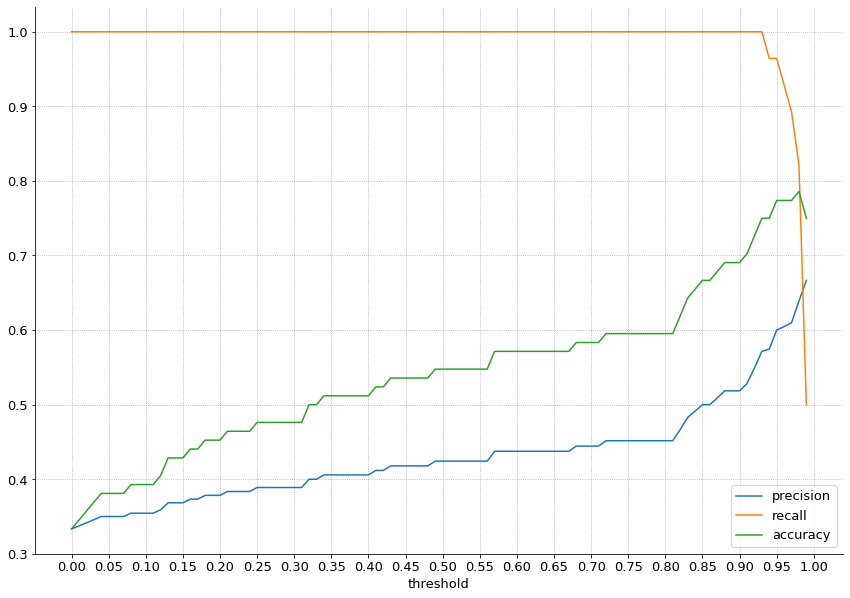

In [48]:
# plot metrics vs thresholds
logistic_regression_util.plot_metrics_by_thresholds(y_train, y_pred_proba.versicolor)

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [50]:
tpr, fpr, thresholds = roc_curve(y_train, y_pred_proba.versicolor)

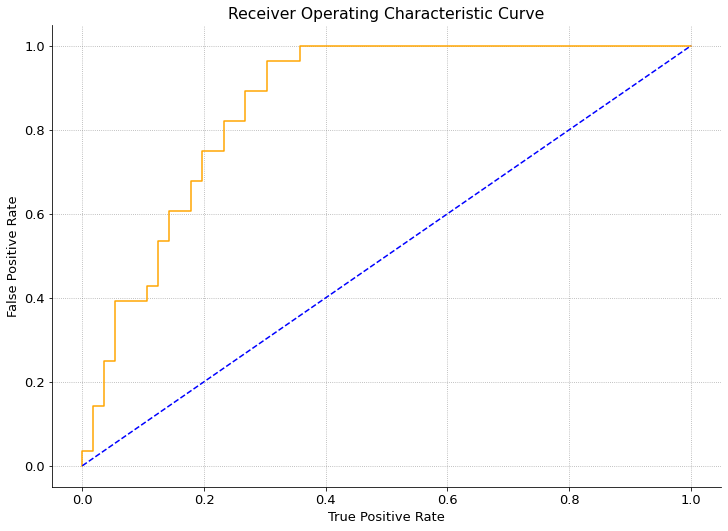

In [52]:
plt.plot(tpr, fpr, color='orange')
plt.plot([0,1], [0,1], color='blue', linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()